# Dev run dem4cli only for 1 country

See if there is a new Perrette dataset ! 

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import pickle as pk
from scipy import interpolate
#import regionmask
import glob, os, re
import openpyxl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 80)
%matplotlib inline 

from population_demographics import * 

In [2]:
df_countries_matched = match_country_names_all_mask_frac();

Unmatched ISIMIP countries (without WCDE data) after all merges:
                   country           country_wb
194                Andorra              Andorra
196               Dominica             Dominica
199                  Palau                Palau
7            Liechtenstein        Liechtenstein
8         Marshall Islands     Marshall Islands
9                   Monaco               Monaco
10                   Nauru                Nauru
12   Saint Kitts and Nevis  St. Kitts and Nevis
13              San Marino           San Marino
14                  Tuvalu               Tuvalu
Unmatched WCDE countries after all merges:
                                   country_wcde
2                                         Aruba
3                               Channel Islands
4                                       Curaçao
5  Macao Special Administrative Region of China
6                                         World
Unmatched ISIMIP mask countries (geojson + frac mask) after all merges:
    

In [3]:
df_countries_matched

,country,country_wb,country_wcde,country_mask,country_iso3,iso3_mask,iso3_frac,country_code,region,income_group
0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,AFG,AFG,AFG,3.0,South Asia,Low income
1,Albania,Albania,Albania,Albania,ALB,ALB,ALB,103.0,Europe & Central Asia,Upper middle income
2,Algeria,Algeria,Algeria,Algeria,DZA,DZA,DZA,203.0,Middle East & North Africa,Upper middle income
3,Andorra,Andorra,None,Andorra,AND,AND,AND,403.0,Europe & Central Asia,High income
4,Angola,Angola,Angola,Angola,AGO,AGO,AGO,503.0,Sub-Saharan Africa,Lower middle income
...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,MNP,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,PSID,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,SXM,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,TCA,NaN,NaN,NaN


In [4]:
df_countries_matched[df_countries_matched['country']=='Portugal']

,country,country_wb,country_wcde,country_mask,country_iso3,iso3_mask,iso3_frac,country_code,region,income_group
141,Portugal,Portugal,Portugal,Portugal,PRT,PRT,PRT,16703.0,Europe & Central Asia,High income


In [5]:
df_cohort_sizes, ages, years = load_cohort_sizes(ssp=2)

In [6]:
df_cohort_sizes

,2_1950,2_1955,2_1960,2_1965,2_1970,2_1975,2_1980,2_1985,2_1990,2_1995,...,102_2055,102_2060,102_2065,102_2070,102_2075,102_2080,102_2085,102_2090,102_2095,102_2100
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1291.6,1355.1,1539.5,1762.1,2025.6,2326.7,2484.4,2276.9,2377.9,3325.5,...,0.2,0.2,0.3,0.4,0.5,0.7,0.9,1.1,1.6,2.4
Albania,180.8,222.5,272.9,309.7,312.3,324.8,335.2,355.5,388.5,334.4,...,3.2,5.5,8.0,9.7,11.8,14.7,19.1,20.3,24.7,35.4
Algeria,1403.1,1830.6,2081.8,2398.0,2692.6,3086.2,3528.0,3893.8,3994.2,3734.3,...,15.7,23.0,35.4,52.8,78.8,123.7,179.8,235.8,281.4,297.1
Angola,739.2,1023.5,1095.3,1196.5,1298.7,1515.1,1810.3,2122.6,2438.5,2799.6,...,0.4,0.5,0.6,0.8,1.1,1.5,2.1,3.0,4.2,6.1
Antigua and Barbuda,6.6,8.4,8.9,9.2,9.9,9.3,7.3,7.2,7.4,6.8,...,0.0,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,2.4,3.3,5.4,8.7,13.2,13.3,23.0,29.2,31.8,34.6,...,0.0,0.0,0.1,0.1,0.2,0.3,0.4,0.5,0.7,0.9
World,338387.2,405612.1,432642.8,480601.0,523700.8,543302.0,548178.6,592792.3,644867.3,623061.1,...,5799.9,7789.0,10822.7,14499.7,18443.9,22134.8,28115.2,36321.0,42244.2,48218.6
Yemen,770.2,777.9,860.3,978.0,1173.4,1348.4,1709.7,2115.3,2603.1,3082.0,...,0.3,0.4,0.5,0.7,1.1,2.1,3.4,5.2,7.8,10.2


In [7]:
df_cohort_sizes[df_cohort_sizes.index=='Portugal']

,2_1950,2_1955,2_1960,2_1965,2_1970,2_1975,2_1980,2_1985,2_1990,2_1995,...,102_2055,102_2060,102_2065,102_2070,102_2075,102_2080,102_2085,102_2090,102_2095,102_2100
Area,,,,,,,,,,,,,,,,,,,,,
Portugal,897.7,897.0,909.2,950.2,828.3,845.1,811.4,706.7,569.3,545.9,...,19.1,25.3,34.4,43.5,57.6,69.1,74.8,80.2,93.6,118.2


In [8]:
da_countrymasks = load_countrymasks_fillcoasts()

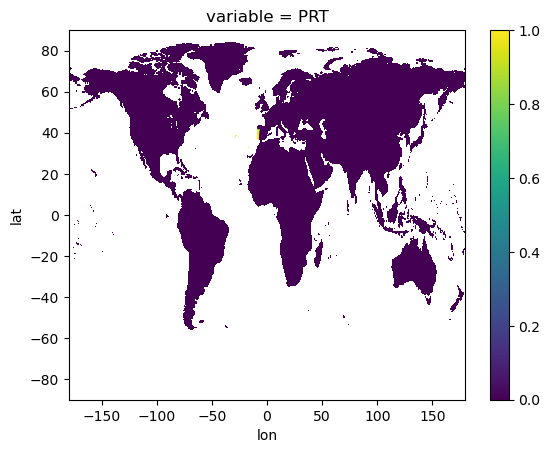

In [9]:
countrycode = df_countries_matched[df_countries_matched['country']=='Portugal'].iso3_mask.values

da_countrymasks.sel(variable = countrycode).plot()

(20.0, 45.0)

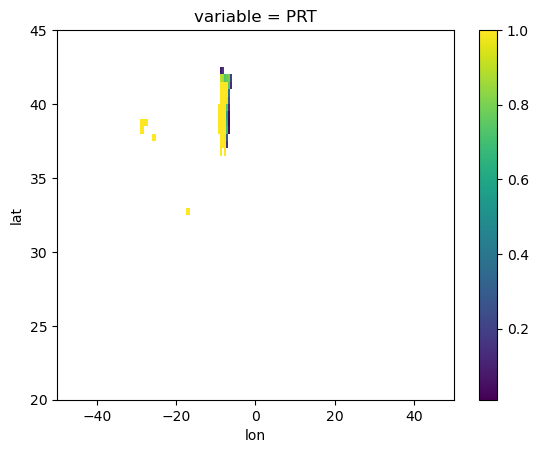

In [10]:
da_mask_country = da_countrymasks.sel(variable = countrycode)

da_mask_country.where(da_mask_country>0).plot()

plt.xlim(-50,50)
plt.ylim(20,45)

In [11]:
shp_filepath_20 = glob.glob(os.path.join(os.environ['VSC_DATA_VO_USER'],'fwi-portugal/data/shapefiles/eurostat/NUTS_RG_20M_2016/NUTS_RG_*.shp'))[0]
shp_nuts = gpd.read_file(shp_filepath_20)
shp_nuts0 = shp_nuts[shp_nuts['LEVL_CODE']==0] 
shp_nuts1 = shp_nuts[shp_nuts['LEVL_CODE']==1] 
shp_nuts2 = shp_nuts[shp_nuts['LEVL_CODE']==2] 
shp_nuts3 = shp_nuts[shp_nuts['LEVL_CODE']==3] 

<Axes: title={'center': 'variable = PRT'}, xlabel='lon', ylabel='lat'>

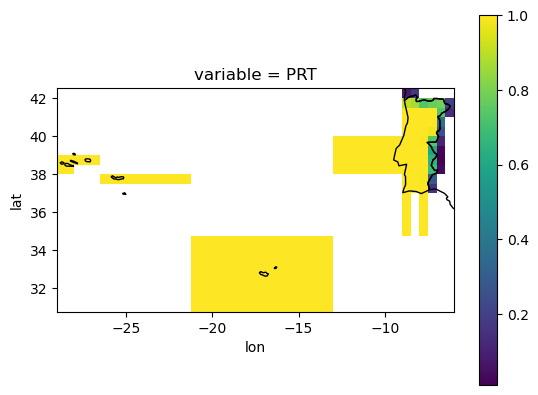

In [12]:
da_mask_country = da_countrymasks.sel(variable = countrycode)

fig,ax=plt.subplots()

da_mask_country_cropped = da_mask_country.where(da_mask_country>0, drop=True)
da_mask_country_cropped.plot(ax=ax)

shp_nuts0.to_crs(epsg=4326).plot(ax=ax, facecolor='none')

#plt.ylim(30,42.5)
#plt.xlim(-10,-6.5)

<Axes: title={'center': 'variable = PRT'}, xlabel='longitude_coordinate [degree]', ylabel='lat [degree]'>

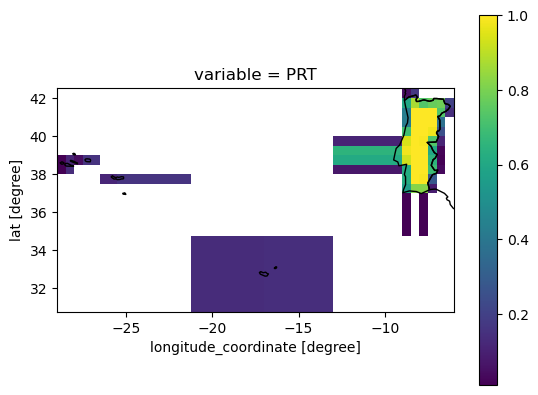

In [13]:
da_countrymasks_test = load_countrymasks_fillcoasts(fillcoast=False)

da_mask_country_test = da_countrymasks_test.sel(variable = countrycode)

fig,ax=plt.subplots()

da_mask_country_test.where(da_mask_country_test>0, drop=True).plot(ax=ax)

shp_nuts0.to_crs(epsg=4326).plot(ax=ax, facecolor='none')

In [14]:
da_mask_country_cropped

<xarray.DataArray (lat: 13, lon: 15, variable: 1)>
array([[[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [0.07936508],
        [0.16831684],
        [       nan],
        [       nan],
        [       nan],
        [       nan]],

       [[       nan],
        [       nan],
        [       nan],
        [       nan],
...
        [1.        ],
        [       nan],
        [       nan],
        [       nan]],

       [[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [1.        ],
        [1.        ],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float64 -28.75 -28.25 -27.75 -27.25 ... -7.25 -6.75 -6.25
  * lat       (lat) float64 42.25 41.75 41.25 40.75 ... 37.75 37.25 36.75 32.75
  * variable  (variable) <U5 'PRT'

In [15]:
bbox = [da_mask_country_cropped.lat[0].values, 
        da_mask_country_cropped.lat[-1].values, 
        da_mask_country_cropped.lon[0].values, 
        da_mask_country_cropped.lon[-1].values]
bbox

[array(42.25), array(32.75), array(-28.75), array(-6.25)]

## open pop only for a national area and remap to CORDEX-11 grid

Check doing also the opposite and see what is best, sensitivity to this step!

### develop opening only for a subregion

In [16]:
dir_population=os.path.join(script_dir, 'data/gridded-pop/')
startyear=2001
endyear=2002
ssp=2
urbanrural=False

if urbanrural:
    VARs=['urban-population','rural-population','total-population']
else:
    VARs='total-population'

In [17]:
with xr.open_dataset(
            os.path.join(dir_population, 'ISIMIP3/ISIMIP3b/histsoc/population_histsoc_30arcmin_annual_1901_2014.nc')
        )[VARs] as da:
    print(da)

<xarray.DataArray 'total-population' (time: 114, lat: 360, lon: 720)>
[29548800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 1901-01-01T12:00:00 ... 2014-01-01T12:00:00
Attributes:
    units:          1
    standard_name:  total population


In [18]:
# Auxiliary function to slice each dataset to a particular region and time with coordinates.
def cut_to_region_time(da):
    if da.time.dtype == 'datetime64[ns]':
        da['time'] = da['time'].dt.year
    else :
        da['time'] = da['time'] + 2015 
    return da.sel(lat=slice(bbox[0], bbox[1]), lon=slice(bbox[2], bbox[3]), time=slice(startyear, endyear))

In [19]:
# Import the file, concatenate years and cut for the chosen region
ds = xr.open_mfdataset(
    os.path.join(dir_population, 'ISIMIP3/ISIMIP3b/histsoc/population_histsoc_30arcmin_annual_1901_2014.nc'),
    combine='nested',
    concat_dim='time',
    decode_coords='all',
    preprocess=cut_to_region_time
)

# Extract the  variable from the imported dataset
da = ds[VARs]
da


<xarray.DataArray 'total-population' (time: 2, lat: 20, lon: 46)>
dask.array<getitem, shape=(2, 20, 46), dtype=float32, chunksize=(2, 20, 46), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 42.25 41.75 41.25 40.75 ... 34.25 33.75 33.25 32.75
  * lon      (lon) float64 -28.75 -28.25 -27.75 -27.25 ... -7.25 -6.75 -6.25
  * time     (time) int64 2001 2002
Attributes:
    units:          1
    standard_name:  total population

<Axes: title={'center': 'time = 2001'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

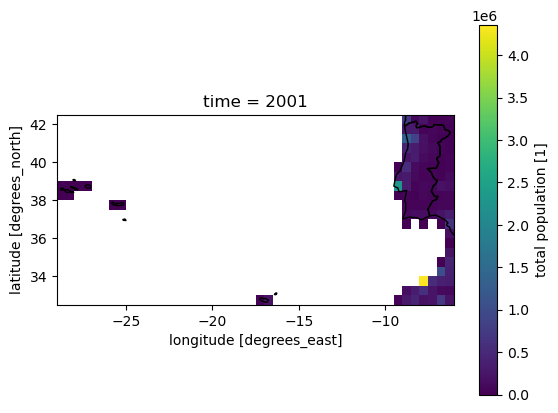

In [20]:
fig,ax=plt.subplots()


da.isel(time=0).plot(ax=ax)
shp_nuts0.to_crs(epsg=4326).plot(ax=ax, facecolor='none')


In [21]:
with xr.open_dataset(
glob.glob(os.path.join(dir_population, f'ISIMIP3/ISIMIP3b/ssp{ssp}*/population_ssp{ssp}_30arcmin_annual_2015_2100.nc'))[0] ,
decode_times=False)[VARs] as da:  #import cftime and then you can open it ! 
    print(da)

<xarray.DataArray 'total-population' (time: 86, lat: 360, lon: 720)>
[22291200 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 81.0 82.0 83.0 84.0 85.0
Attributes:
    standard_name:  total population
    long_name:      total population
    units:          1


In [22]:
# Import the file, concatenate years and cut for the chosen region
ds = xr.open_mfdataset(
    glob.glob(os.path.join(dir_population, f'ISIMIP3/ISIMIP3b/ssp{ssp}*/population_ssp{ssp}_30arcmin_annual_2015_2100.nc'))[0] ,
    combine='nested',
    concat_dim='time',
    decode_times=False,
    preprocess=cut_to_region_time
)

# Extract the  variable from the imported dataset
da = ds[VARs]
da

<xarray.DataArray 'total-population' (time: 0, lat: 20, lon: 46)>
dask.array<getitem, shape=(0, 20, 46), dtype=float32, chunksize=(0, 20, 46), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 42.25 41.75 41.25 40.75 ... 34.25 33.75 33.25 32.75
  * lon      (lon) float64 -28.75 -28.25 -27.75 -27.25 ... -7.25 -6.75 -6.25
  * time     (time) float64 
Attributes:
    standard_name:  total population
    long_name:      total population
    units:          1

### Test fxn

In [23]:
da_population = load_population_cut_to_region(
    startyear=2005,
    endyear=2020,
    ssp=2,
    urbanrural=False,
    bbox=bbox
)

In [24]:
da_population

<xarray.DataArray 'total-population' (time: 16, lat: 20, lon: 46)>
dask.array<concatenate, shape=(16, 20, 46), dtype=float32, chunksize=(10, 20, 46), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 42.25 41.75 41.25 40.75 ... 34.25 33.75 33.25 32.75
  * lon      (lon) float64 -28.75 -28.25 -27.75 -27.25 ... -7.25 -6.75 -6.25
  * time     (time) int64 2005 2006 2007 2008 2009 ... 2016 2017 2018 2019 2020
Attributes:
    units:          1
    standard_name:  total population

In [25]:
#da_population.isel(time=0).plot()

In [26]:
da_cohort_size = interpolate_cohortsize_countries(df_cohort_sizes,
                                                 ages,
                                                 years)

interpolating cohort sizes per country
after interpolation and mean-preserving correction there are some neg numbers in 10, Azerbaijan, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 102, Libyan Arab Jamahiriya, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 136, Papua New Guinea, setting them to zero


In [27]:
da_mask_country

<xarray.DataArray (lat: 360, lon: 720, variable: 1)>
array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
...
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat       (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * variable  (variable) <U5 'PRT'

In [28]:
da_countrymasks

<xarray.DataArray (lat: 360, lon: 720, variable: 225)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat       (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * variable  (variable) <U5 'AFG' 'AGO' 'ALB' 'AND' ... 'YEM' 'ZAF' 'ZMB' 'ZWE'

In [29]:
da_cohort_size

<xarray.DataArray 'cohort_size' (country: 202, time: 151, ages: 105)>
array([[[2.81368000e+02, 2.69844000e+02, 2.58320000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.83244000e+02, 2.72052000e+02, 2.60860000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.85120000e+02, 2.74260000e+02, 2.63400000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.31485440e+03, 1.32540320e+03, 1.33595200e+03, ...,
         2.02648339e-01, 0.00000000e+00, 0.00000000e+00],
        [1.29708720e+03, 1.30794160e+03, 1.31879600e+03, ...,
         2.21324170e-01, 0.00000000e+00, 0.00000000e+00],
        [1.27932000e+03, 1.29048000e+03, 1.30164000e+03, ...,
         2.40000000e-01, 0.00000000e+00, 0.00000000e+00]],

       [[3.80000000e+01, 3.70800000e+01, 3.61600000e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.01112000e+01, 3.89696000e+01, 3.78280000e+01, ...,
         1.20000000e-02, 6.40000000e-03, 8.00000000e-04],
        [4.22224000e+01, 4.08592000e+01, 3.94960000e+01, ...,
         2.40000000e-02, 1.28000000e-02, 1.60000000e-03],
...
        [6.31817600e+02, 6.36504800e+02, 6.41192000e+02, ...,
         3.72662580e-01, 0.00000000e+00, 0.00000000e+00],
        [6.25712800e+02, 6.30494400e+02, 6.35276000e+02, ...,
         4.01361052e-01, 0.00000000e+00, 0.00000000e+00],
        [6.19608000e+02, 6.24484000e+02, 6.29360000e+02, ...,
         4.30059524e-01, 0.00000000e+00, 0.00000000e+00]],

       [[9.24800000e+01, 9.04000000e+01, 8.83200000e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.01888800e+02, 9.85704000e+01, 9.52520000e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.11297600e+02, 1.06740800e+02, 1.02184000e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.30172000e+02, 2.32244000e+02, 2.34316000e+02, ...,
         7.49049973e-01, 0.00000000e+00, 0.00000000e+00],
        [2.27352000e+02, 2.29400000e+02, 2.31448000e+02, ...,
         7.96253958e-01, 0.00000000e+00, 0.00000000e+00],
        [2.24532000e+02, 2.26556000e+02, 2.28580000e+02, ...,
         8.43457944e-01, 0.00000000e+00, 0.00000000e+00]]])
Coordinates:
  * country  (country) object 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'
  * time     (time) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100
  * ages     (ages) int64 0 1 2 3 4 5 6 7 8 ... 96 97 98 99 100 101 102 103 104

In [30]:
da_cohort_size.sel(country='Portugal')

<xarray.DataArray 'cohort_size' (time: 151, ages: 105)>
array([[1.88140000e+02, 1.83840000e+02, 1.79540000e+02, ...,
        2.89855072e-02, 0.00000000e+00, 0.00000000e+00],
       [1.87020800e+02, 1.83266400e+02, 1.79512000e+02, ...,
        2.55693582e-02, 0.00000000e+00, 0.00000000e+00],
       [1.85901600e+02, 1.82692800e+02, 1.79484000e+02, ...,
        2.21532091e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.16136000e+01, 6.18208000e+01, 6.20280000e+01, ...,
        2.16720000e+01, 1.59224000e+01, 1.01728000e+01],
       [6.16088000e+01, 6.18064000e+01, 6.20040000e+01, ...,
        2.26560000e+01, 1.68952000e+01, 1.11344000e+01],
       [6.16040000e+01, 6.17920000e+01, 6.19800000e+01, ...,
        2.36400000e+01, 1.78680000e+01, 1.20960000e+01]])
Coordinates:
    country  <U8 'Portugal'
  * time     (time) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100
  * ages     (ages) int64 0 1 2 3 4 5 6 7 8 ... 96 97 98 99 100 101 102 103 104

In [37]:
 da_pop_demographics = get_gridscale_demographics(da_population,
                                                 da_mask_country, # subselect only to country
                                                 df_countries_matched,
                                                 da_cohort_size.sel(country='Portugal'), # subselect only to country
                                                 startyear=2005,
                                                endyear=2020);



# clean up this fxn option to have a country !! 

Portugal


(-10.0, -6.5)

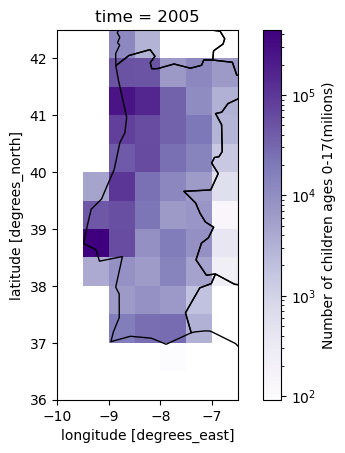

In [62]:
from matplotlib.colors import LogNorm

fig,ax=plt.subplots()



da= da_pop_demographics.isel(time=0, ages=slice(0,18)).sum(dim='ages')

da.where(da > 0).plot(
    cmap='Purples',
    norm=LogNorm(),
    ax=ax,
     cbar_kwargs={'label': "Number of children ages 0-17(milions)"}
)

shp_nuts1.to_crs(epsg=4326).plot(ax=ax, facecolor='none')


plt.ylim(36,42.5)
plt.xlim(-10,-6.5)

(-10.0, -6.5)

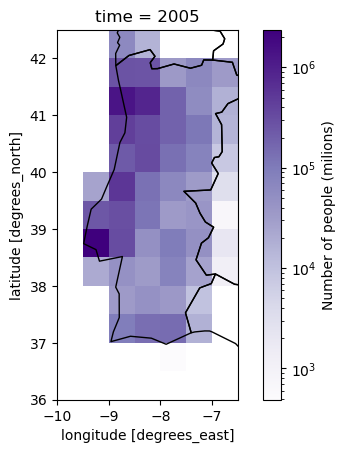

In [61]:
fig,ax=plt.subplots()



da= da_pop_demographics.isel(time=0).sum(dim='ages')

da.where(da > 0).plot(
    cmap='Purples',
    norm=LogNorm(),
    ax=ax,
     cbar_kwargs={'label': "Number of people (milions)"}
)

shp_nuts1.to_crs(epsg=4326).plot(ax=ax, facecolor='none')


plt.ylim(36,42.5)
plt.xlim(-10,-6.5)

In [60]:
da.sum() # units millions of people 

<xarray.DataArray ()>
array(10508494.25360107)
Coordinates:
    time     int64 2005

# Open and preprocess life expectancy data

see in population_demographics_climate.py 

load_unwpp_data() and get_cohortsize_countries()

In [106]:
def load_unwpp():
    
    filepath_unwpp = os.path.join('./data/life-expectancy/UN_WPP2024/WPP2024_MORT_F05_1_LIFE_EXPECTANCY_BY_AGE_BOTH_SEXES.xlsx')
    
    df_unwpp_raw = pd.read_excel(filepath_unwpp, 
             sheet_name=0,
             skiprows=16) # make this more flex 
    
    df_unwpp = df_unwpp_raw[df_unwpp_raw['Type']=='Country/Area'].rename(
              columns={'Region, subregion, country or area *':'Country'}) # make this more flex 
    
    cols = df_unwpp.columns
    
    # decide whether to keep country name or ISO3 
    # probably better ISO3 ! 
    idxs = [i for i, col in enumerate(cols) if col in ('Country',  'Year', 5)] #  'ISO3 Alpha-code', get only life expectancy at age 5

    df_unwpp = df_unwpp.iloc[:, idxs].pivot(
        index='Year',
        columns='Country',
        values=5)

    # years left to live of someone who is 5 years old in that year
    # so i think i need to do year - 5 to get year of birth
    # then add 5 to the years left to live
    # then add 6 for the cohort transformation 
    
    df_unwpp.index = df_unwpp.index.astype(int)

    return df_unwpp

In [64]:
filepath_unwpp = os.path.join('./data/life-expectancy/UN_WPP2024/WPP2024_MORT_F05_1_LIFE_EXPECTANCY_BY_AGE_BOTH_SEXES.xlsx')

In [71]:
df_unwpp_raw = pd.read_excel(filepath_unwpp, 
             sheet_name=0,
             skiprows=16)

In [76]:
df_unwpp_raw

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,91,92,93,94,95,96,97,98,99,100+
0,1,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,2.7007,2.5504,2.4222,2.3003,2.1892,2.0747,1.9744,1.8894,1.8183,1.7551
1,2,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,2.6951,2.5517,2.4214,2.3022,2.1996,2.0955,1.9963,1.91,1.8378,1.7793
2,3,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,2.7449,2.5997,2.4748,2.3534,2.246,2.147,2.0515,1.9601,1.8815,1.8183
3,4,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,2.7341,2.5854,2.4559,2.345,2.2357,2.1379,2.0488,1.9634,1.8832,1.8153
4,5,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,2.7793,2.6277,2.4937,2.3728,2.2659,2.163,2.071,1.987,1.9067,1.8325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22051,22052,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,4.4486,4.2203,3.9736,3.7138,3.4714,3.2984,3.1194,2.9238,2.7556,2.616
22052,22053,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,4.4718,4.2113,3.9998,3.7689,3.5238,3.2946,3.1343,2.9672,2.7832,2.6256
22053,22054,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,4.3065,4.0481,3.8218,3.6419,3.4433,3.2315,3.0342,2.9019,2.7626,2.6038
22054,22055,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,4.5352,4.2669,4.0049,3.7757,3.596,3.3941,3.1762,2.9717,2.8342,2.6892


In [103]:
df_unwpp = df_unwpp_raw[df_unwpp_raw['Type']=='Country/Area'].rename(
    columns={'Region, subregion, country or area *':'Country'})

In [104]:
cols = df_unwpp.columns

# decide whether to keep country name or ISO3 
# probably better ISO3 ! 
idxs = [i for i, col in enumerate(cols) if col in ('Country',  'Year', 5)] #  'ISO3 Alpha-code', get only life expectancy at age 5 
idxs

[2, 10, 16]

In [105]:
df_unwpp = df_unwpp.iloc[:, idxs].pivot(
    index='Year',
    columns='Country',
    values=5)

# years left to live of someone who is 5 years old in that year
# so i think i need to do year - 5 to get year of birth
# then add 5 to the years left to live
# then add 6 for the cohort transformation 

df_unwpp.index = df_unwpp.index.astype(int)

df_unwpp

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1950,42.3261,58.2296,52.584,61.0589,65.7722,48.762,58.7683,60.8547,62.1144,61.5277,...,65.2805,59.9224,49.4022,55.0496,51.9989,48.1348,46.6815,51.4295,56.365,55.3182
1951,42.5996,58.4998,53.1647,61.1837,66.0034,48.8569,59.0189,61.1268,62.4322,61.7482,...,65.4038,60.067,47.968,55.7221,52.3894,48.2239,46.9052,51.549,56.5156,55.569
1952,42.8688,59.1581,53.1422,61.4278,66.2782,48.9553,59.2406,61.3293,63.1116,61.9654,...,65.5524,60.1997,50.3336,56.2419,52.7909,48.3332,47.1262,51.6602,56.7378,55.8106
1953,43.1415,59.9094,53.0927,61.6784,66.708,49.09,59.4861,61.5323,62.9636,62.1779,...,65.6936,60.3296,50.6748,56.7611,53.1265,48.5364,47.3487,51.8188,56.9695,56.0438
1954,43.1671,60.556,48.9824,61.8803,67.1366,49.1895,59.7363,61.72,63.4988,62.3851,...,65.8463,60.46,51.1492,57.2673,55.4409,48.7734,47.5814,51.9305,57.1568,56.278
1955,43.7051,61.2933,49.0833,62.0935,67.4736,49.3326,60.0196,61.9259,62.986,62.5868,...,65.9994,60.5994,51.5983,57.7405,57.7827,49.0066,47.8167,52.0338,57.3711,56.5054
1956,43.9914,62.117,48.9968,62.3142,67.7848,49.4601,60.3453,62.1271,63.8442,62.7835,...,66.1543,60.7428,52.0074,58.2576,58.2194,49.2678,48.0545,52.2106,57.5591,56.7423
1957,44.3287,63.0791,48.8907,62.5873,68.0685,49.5222,60.6498,62.3441,63.3825,62.9763,...,66.303,60.891,52.3789,58.761,58.5801,49.5338,48.2911,52.3482,57.714,56.9825
1958,44.6465,64.0774,48.7686,63.0095,68.449,49.5925,60.9511,62.5912,64.4063,63.1662,...,66.4524,61.0515,52.7587,59.2772,58.953,49.8083,48.5263,52.5801,57.9539,57.2102


In [107]:
df_unwpp = load_unwpp()

<Axes: xlabel='Year'>

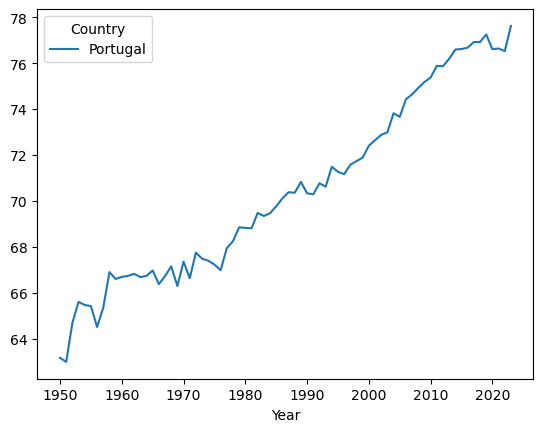

In [112]:
df_unwpp.loc[:,['Portugal']].plot() # life expectancy at age 5 

In [129]:
def get_life_expectancies(df_unwpp):
    
    """
    - Takes UNWPP life expectancy data expressed as years left to live at age of 5, 
    subtracts 5 from Year to get it at birth year but ignoring infant mortality, 
    adds 5 to account for the 5 years of life already lived, adds 6 to account for increase 
    in life expectancy through the life of an individual (i.e. move from "period" life expectancy to 
    "cohort" life expectancy, see Goldstein & Wachter (2006) "Relationships between period and cohort 
    life expectancy: Gaps and lags")
    - Thus get life expectancy in each year for each country at birth 
    expressed in "cohort" way, neglecting infant mortality.

    """
    
    df_life_expectancy_5 = df_unwpp.copy()
    df_life_expectancy_5.index = df_life_expectancy_5.index-5 # year of birth 
    df_life_expectancy_5 = df_life_expectancy_5 + 5 + 6 

    df_life_expectancy_5_interp = df_life_expectancy_5.reindex(
        np.arange(1945,2020+1)).astype(
        'float').interpolate() # fills last two years constant at 2018 level 
    
    return df_life_expectancy_5_interp


# goes until 2018 now ! what to do until 2020 

In [130]:
life_expectancy_PT = get_life_expectancies(df_unwpp.loc[:,['Portugal']])
life_expectancy_PT

Country,Portugal
Year,
1945,74.1651
1946,73.9846
1947,75.6844
1948,76.5995
1949,76.4642
1950,76.4170
1951,75.5057
1952,76.3479
1953,77.8980


<Axes: xlabel='Year'>

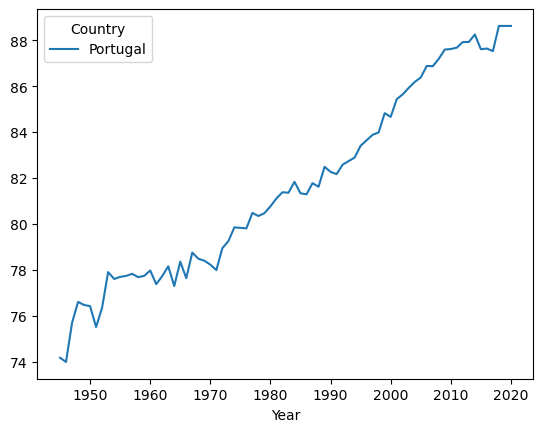

In [131]:
life_expectancy_PT.plot()

# Remap to CORDEX grids